In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Step 2: Load dataset and clean column names
df = pd.read_csv("Ice_cream_selling_data.csv")

# Remove accidental leading/trailing spaces and rename target column
df.columns = df.columns.str.strip()
df.rename(columns={"Ice Cream Sales": "Ice_Cream_Sales"}, inplace=True)

print("First 5 rows:")
display(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows:


,Temperature,Ice_Cream_Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531



Missing values per column:
Temperature        0
Ice_Cream_Sales    0
dtype: int64


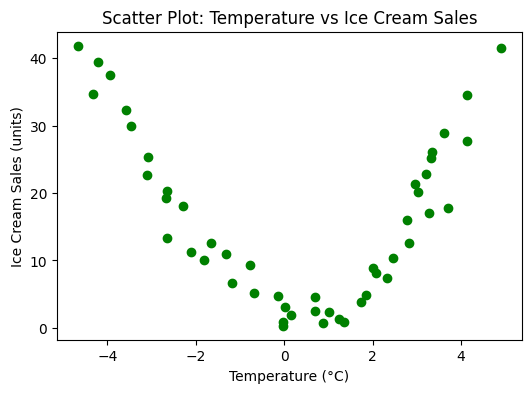


Correlation matrix:
                 Temperature  Ice_Cream_Sales
Temperature         1.000000        -0.175184
Ice_Cream_Sales    -0.175184         1.000000


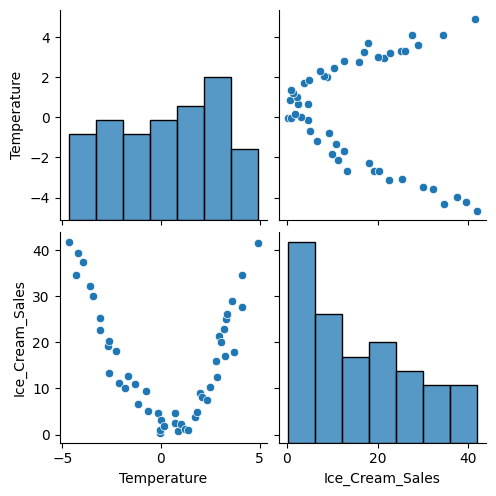

In [3]:
# Step 3: Quick EDA — scatter and correlation
plt.figure(figsize=(6,4))
plt.scatter(df["Temperature"], df["Ice_Cream_Sales"], color='green')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Scatter Plot: Temperature vs Ice Cream Sales")
plt.show()

print("\nCorrelation matrix:")
print(df.corr())
sns.pairplot(df)
plt.show()

In [4]:
# Step 4: Define features and target
X = df[['Temperature']]   # 2D DataFrame (required by sklearn)
y = df['Ice_Cream_Sales'] # 1D Series

In [5]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print(f"Train Shape: {X_train.shape}")
print(f"Test Shape : {X_test.shape}")

Train Shape: (36, 1)
Test Shape : (13, 1)


In [6]:
# Helper function to print metrics
def print_metrics(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} metrics:")
    print(f"  MSE : {mse:.4f}")
    print(f"  MAE : {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2  : {r2:.4f}")
    print("")

In [7]:
# Step 6: Baseline — Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred_lin = lin_reg.predict(X_test)
print_metrics(y_test, y_pred_lin, label="Linear Regression (baseline)")

Linear Regression (baseline) metrics:
  MSE : 132.8977
  MAE : 11.0536
  RMSE: 11.5281
  R2  : -0.2463



In [9]:
# Plot linear fit (line shown using sorted training X for correct display)
sort_idx = X_train['Temperature'].argsort()
X_train_sorted = X_train.iloc[sort_idx]
y_lin_sorted = lin_reg.predict(X_train_sorted)

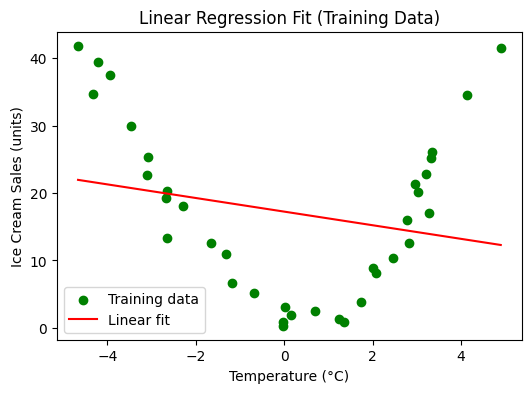

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.plot(X_train_sorted, y_lin_sorted, color='red', label='Linear fit')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Linear Regression Fit (Training Data)")
plt.legend()
plt.show()

In [11]:
# Step 7: Polynomial feature transform (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)  # fit_transform on DataFrame preserves feature_names_in_
X_test_poly  = poly.transform(X_test)

In [12]:
# show first 5 transformed feature rows with names
feature_names = poly.get_feature_names_out(X_train.columns)
print("\nFirst 5 polynomial-transformed rows (features):")
display(pd.DataFrame(X_train_poly, columns=feature_names).head())


First 5 polynomial-transformed rows (features):


,1,Temperature,Temperature^2
0,1.0,-2.672461,7.142047
1,1.0,-3.949661,15.599823
2,1.0,-3.108440,9.662400
3,1.0,3.211366,10.312873
4,1.0,3.270044,10.693188


In [13]:
# Step 8: Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Step 9: Evaluate polynomial model on test set
y_pred_poly = poly_reg.predict(X_test_poly)
print_metrics(y_test, y_pred_poly, label="Polynomial Regression (degree=2)")

Polynomial Regression (degree=2) metrics:
  MSE : 13.8919
  MAE : 3.1720
  RMSE: 3.7272
  R2  : 0.8697



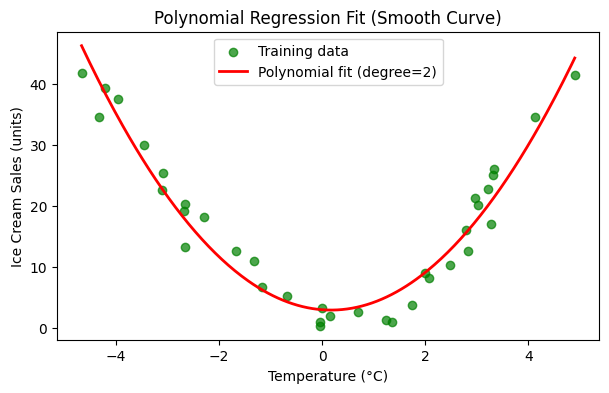

In [15]:
# Step 10: Visualize polynomial fit as a smooth curve
X_plot = np.linspace(X['Temperature'].min(), X['Temperature'].max(), 300).reshape(-1, 1)
X_plot_df = pd.DataFrame(X_plot, columns=['Temperature'])   # DataFrame to avoid warnings
X_plot_poly = poly.transform(X_plot_df)
y_plot = poly_reg.predict(X_plot_poly)

plt.figure(figsize=(7,4))
plt.scatter(X_train, y_train, color='green', alpha=0.7, label='Training data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial fit (degree=2)')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Polynomial Regression Fit (Smooth Curve)")
plt.legend()
plt.show()

In [16]:
# Step 11: Predict for new temperatures — beginner-friendly & warning-free
new_temps = [0, 2, 5]                               # temperatures we want predictions for
new_df = pd.DataFrame({'Temperature': new_temps})   # keep same column name as training data

In [17]:
# transform using the fitted PolynomialFeatures and predict
new_df_poly = poly.transform(new_df)
preds = poly_reg.predict(new_df_poly)

In [18]:
# show results in a clean table
results = pd.DataFrame({
    'Temperature (°C)': new_temps,
    'Predicted Ice_Cream_Sales': np.round(preds, 2)
})
print("\nPredictions for new temperatures:")
display(results)


Predictions for new temperatures:


,Temperature (°C),Predicted Ice_Cream_Sales
0,0,2.96
1,2,9.07
2,5,46.05


In [19]:
# Also print them in an easy-to-read loop
for temp, sale in zip(results['Temperature (°C)'], results['Predicted Ice_Cream_Sales']):
    print(f"At Temperature {temp}°C → Predicted Ice Cream Sales = {sale:.2f} units")

At Temperature 0°C → Predicted Ice Cream Sales = 2.96 units
At Temperature 2°C → Predicted Ice Cream Sales = 9.07 units
At Temperature 5°C → Predicted Ice Cream Sales = 46.05 units
